Basic goal is to effectively tie all quarters for 2017 together and take a basic look at the data.

In [1]:
%matplotlib inline
import pandas as pd
import os
import numpy as np

In [2]:
data_folder = os.getenv('bike_data_folder')

In [3]:
q1_2017 = pd.read_csv(data_folder+'/bikeshare_ridership_2017_Q1.csv')
q2_2017 = pd.read_csv(data_folder+'/bikeshare_ridership_2017_Q2.csv')
q3_2017 = pd.read_csv(data_folder+'/bikeshare_ridership_2017_Q3.csv')
q4_2017 = pd.read_csv(data_folder+'/bikeshare_ridership_2017_Q4.csv')

In [4]:
q1_2017.tail(3)

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
132120,868662,31/03/2017 23:49,31/03/2017 23:57,442,7006,Bay St / College St (East Side),7066,Willcocks St / St. George St,Member
132121,868663,31/03/2017 23:52,1/4/2017 0:10,1116,7057,Simcoe St / Wellington St W,7023,College St W / Borden St,Member
132122,868664,31/03/2017 23:54,31/03/2017 23:56,155,7014,Sherbourne St / Carlton St (Allan Gardens),7113,Parliament St / Aberdeen Ave,Member


In [5]:
q2_2017.tail(3)

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
333350,1253141,30/06/2017 23:59,1/7/2017 0:03,227,7049,Queen St W / Portland St,7046,Niagara St / Richmond St W,Member
333351,1253142,30/06/2017 23:59,1/7/2017 0:34,2067,7199,College St W / Markham St,7043,Queens Quay W / Lower Simcoe St,Casual
333352,1253144,30/06/2017 23:59,1/7/2017 0:26,1623,7006,Bay St / College St (East Side),7093,Danforth Ave / Gough Ave,Member


In [6]:
q3_2017.tail(3)

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_name,to_station_name,user_type
663485,1971682,9/30/2017 23:59,10/1/2017 0:18,1114,Baldwin Ave / Spadina Ave - SMART,Hanna Ave / Liberty St,Member
663486,1971683,9/30/2017 23:59,10/1/2017 0:19,1192,Queens Quay W / Lower Simcoe St,Exhibition GO Station,Casual
663487,1971684,9/30/2017 23:59,10/1/2017 0:19,1190,Queens Quay W / Lower Simcoe St,Exhibition GO Station,Casual


In [7]:
q4_2017.tail(3)

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_name,to_station_name,user_type
363402,2383644,12/31/17 23:47:40,12/31/17 23:57:49,609,Kendal Ave / Spadina Rd,Augusta Ave / Denison Sq,Member
363403,2383645,12/31/17 23:49:08,12/31/17 23:49:34,26,Phoebe St / Spadina Ave,Phoebe St / Spadina Ave,Member
363404,2383646,12/31/17 23:49:41,12/31/17 23:57:41,480,Phoebe St / Spadina Ave,Simcoe St / Queen St W,Member


There were two format changes from H1 2017 to Q3 2017:

1. two columns were dropped: from_station_id and to_station_id
2. the date format was changed from 'd/m/Y H:M to m/d/Y H:M'

From Q3 2017 to Q4 2017 there was another date format change from 'm/d/Y H:M to m/d/y H:M:S'

In [8]:
h1_2017 = pd.concat([q1_2017, q2_2017])

In [9]:
h1_2017['start_dt_tm'] = pd.to_datetime(h1_2017['trip_start_time'],
                                           format='%d/%m/%Y %H:%M')
h1_2017['stop_dt_tm'] = pd.to_datetime(h1_2017['trip_stop_time'],
                                           format='%d/%m/%Y %H:%M')

In [10]:
q3_2017['start_dt_tm'] = pd.to_datetime(q3_2017['trip_start_time'],
                                           format='%m/%d/%Y %H:%M')
q3_2017['stop_dt_tm'] = pd.to_datetime(q3_2017['trip_stop_time'],
                                           format='%m/%d/%Y %H:%M')

In [11]:
q4_2017['start_dt_tm'] = pd.to_datetime(q4_2017['trip_start_time'],
                                           format='%m/%d/%y %H:%M:%S')

The following code produces this error: ValueError: time data 'NULLNULL' does not match format '%m/%d/%y %H:%M:%S' (match)

```python
q4_2017['stop_dt_tm'] = pd.to_datetime(q4_2017['trip_stop_time'],
                                           format='%m/%d/%y %H:%M:%S')
```

In [12]:
bad_data = q4_2017['trip_stop_time']=='NULLNULL'

In [13]:
q4_2017['stop_dt_tm'] = pd.to_datetime(q4_2017.loc[~bad_data, 'trip_stop_time'],
                                           format='%m/%d/%y %H:%M:%S')

In [14]:
sum(bad_data)

1

In [15]:
# since there's only a single row, let's drop it to keep our lives easy
q4_2017 = q4_2017.loc[~bad_data]

In [16]:
h2_2017 = pd.concat([q3_2017, q4_2017])

In [17]:
h2_2017['from_station_id'] = np.nan
h2_2017['to_station_id'] = np.nan

In [18]:
total_2017 = pd.concat([h1_2017, h2_2017], sort=True)

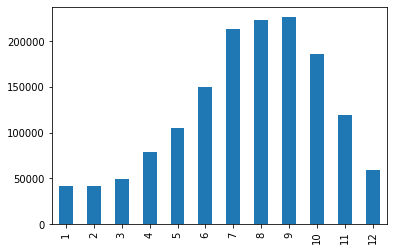

In [29]:
total_2017.start_dt_tm.dt.month.value_counts().sort_index().plot.bar()

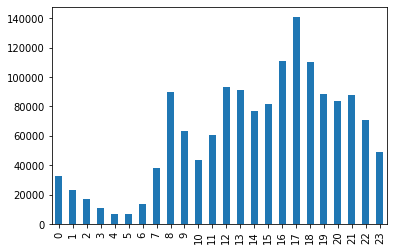

In [30]:
total_2017.start_dt_tm.dt.hour.value_counts().sort_index().plot.bar()

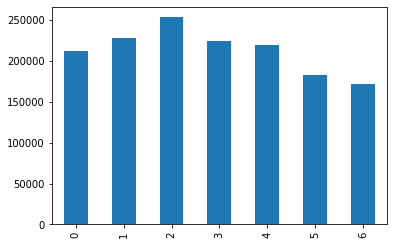

In [37]:
total_2017.start_dt_tm.dt.weekday.value_counts().sort_index().plot.bar()

In [43]:
rides_by_dow_hour = pd.pivot_table(total_2017,
                       index=[total_2017.start_dt_tm.dt.hour],
                       columns=[total_2017.start_dt_tm.dt.weekday],
                       aggfunc='size')

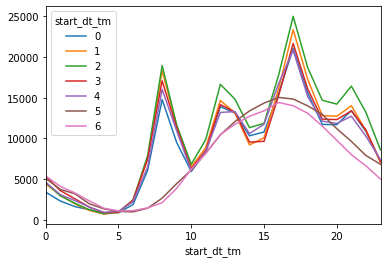

In [44]:
rides_by_dow_hour.plot()

In [45]:
time_by_dow_hour = pd.pivot_table(total_2017, values='trip_duration_seconds',
                       index=[total_2017.start_dt_tm.dt.hour],
                       columns=[total_2017.start_dt_tm.dt.weekday],
                       aggfunc=np.sum)

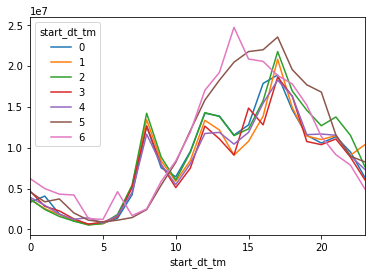

In [46]:
time_by_dow_hour.plot()

In [47]:
total_2017.to_station_name.value_counts().head(10)

Union Station                              29228
Simcoe St / Wellington St W                22809
York St / Queens Quay W                    20768
King St W / Spadina Ave                    19521
Queen St W / Portland St                   17872
Bay St / College St (East Side)            17100
Phoebe St / Spadina Ave                    16093
Front St W / Blue Jays Way                 16075
Bay St / Queens Quay W (Ferry Terminal)    16029
Bay St / Albert St                         15780
Name: to_station_name, dtype: int64

In [48]:
total_2017.from_station_name.value_counts().head(10)

Union Station                      22143
Simcoe St / Wellington St W        21365
York St / Queens Quay W            19143
Bay St / Wellesley St W            18082
King St W / Spadina Ave            18039
Bay St / College St (East Side)    17381
Queen St W / Portland St           17295
Front St W / Blue Jays Way         16173
Simcoe St / Queen St W             15234
College Park South                 15187
Name: from_station_name, dtype: int64

In [32]:
total_2017.user_type.value_counts()

Member    1164784
Casual     327585
Name: user_type, dtype: int64